In [3]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.1


>10 0.856 (0.032)
>60_75 0.882 (0.024)
>60_80 0.901 (0.027)
>60_85 0.892 (0.025)
>60_90 0.897 (0.027)
>60_95 0.902 (0.020)
>60_100 0.890 (0.023)
>60_105 0.893 (0.023)
>60_110 0.896 (0.023)
>100_115 0.902 (0.028)


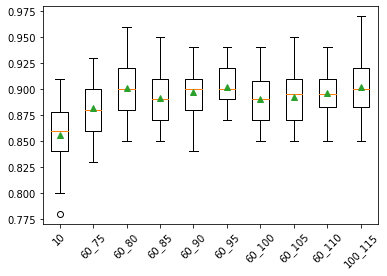

In [5]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    models['10'] = RandomForestClassifier(max_samples=0.1)
    models['60_75'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=75, max_depth=6, verbose=2)
    models['60_80'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=80, max_depth=None, verbose=2)
    models['60_85'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=85, max_depth=None, verbose=2)
    models['60_90'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=100, max_depth=None, verbose=2)
    models['60_95'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=195, max_depth=None, verbose=2)
    models['60_100'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=400, max_depth=7, verbose=1)
    models['60_105'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=605, max_depth=8, verbose=1)
    models['60_110'] = RandomForestClassifier(max_samples=0.6, max_features=4, n_estimators=910, max_depth=9, verbose=1)
    models['100_115'] = RandomForestClassifier(max_samples=None)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()